In [1]:
import json

IN = "cars_fb.jsonl"

cars = []
with open(IN) as f:
    for l in f:
        cars.append(json.loads(l))


In [2]:
print(len(cars))

63931


In [119]:
seller_ct = {}
price = []
make_ct = {}
model_ct = {}

In [120]:
def add(d, k):
    if k in d:
        d[k] = d[k] + 1
    else:
        d[k] = 0
    return d

for car in cars:
    add(seller_ct, car["seller"])
    add(make_ct, car["make-name"])
    add(model_ct, car["model-name"])
    if(car["price"] and car["price"] != ''):
        price.append(int(car["price"]))

In [18]:
import matplotlib.pyplot as plt

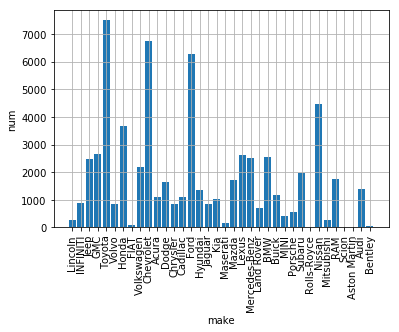

In [132]:
import matplotlib.pyplot as plt
bars = plt.bar(range(len(make_ct)), make_ct.values(), width=0.8)
plt.xticks(range(len(make_ct)), make_ct.keys(), rotation=90 )
plt.xlabel('make', rotation='horizontal')
plt.ylabel('num', rotation='vertical')
plt.grid(True)
plt.figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')
plt.show()

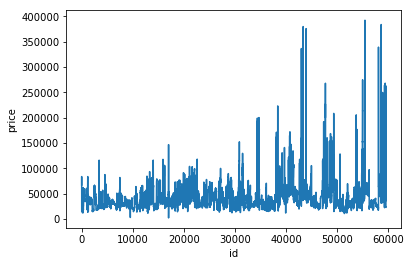

In [97]:
lines = plt.plot(price)
plt.ylabel('price')
plt.xlabel('id')
plt.show()

In [98]:
import matplotlib.pyplot as plt
x= [1,2,3]
y=[1,2,3]
lines = plt.plot(x, y)
plt.setp(lines)

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  antialiased or aa: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash

In [88]:
import operator
sorted(make_ct.items(), key=operator.itemgetter(1))

[('Rolls-Royce', 13),
 ('Aston Martin', 16),
 ('Scion', 21),
 ('Bentley', 40),
 ('FIAT', 91),
 ('Maserati', 168),
 ('Lincoln', 254),
 ('Mitsubishi', 257),
 ('MINI', 423),
 ('Porsche', 571),
 ('Land Rover', 705),
 ('Jaguar', 830),
 ('Chrysler', 834),
 ('Volvo', 860),
 ('INFINITI', 892),
 ('Kia', 1016),
 ('Acura', 1101),
 ('Cadillac', 1111),
 ('Buick', 1161),
 ('Hyundai', 1363),
 ('Audi', 1408),
 ('Dodge', 1626),
 ('Mazda', 1708),
 ('RAM', 1735),
 ('Subaru', 1987),
 ('Volkswagen', 2186),
 ('Jeep', 2486),
 ('Mercedes-Benz', 2515),
 ('BMW', 2560),
 ('Lexus', 2628),
 ('GMC', 2642),
 ('Honda', 3670),
 ('Nissan', 4480),
 ('Ford', 6277),
 ('Chevrolet', 6765),
 ('Toyota', 7495)]